In [ ]:
#Import packages
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [ ]:
#Load data. Find data at "https://www.kaggle.com/datasets/shivachandel/kc-house-data"
houses = pd.read_csv('kc_house_data.csv')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Features
X = houses.drop(['id', 'date', 'price'], axis=1)
#Target
Y = houses['price']

In [ ]:
from sklearn.preprocessing import StandardScaler

#Normalize data using standard scaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

#Create train test split
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size = 0.2)

In [ ]:
#Create sequential class
model2 = keras.Sequential()

#First hidden layer
model2.add(keras.layers.Dense(10, activation = 'relu'))

#Second hidden layer
# model2.add(keras.layers.Dense(20, activation='relu'))

#Output layer
model2.add(keras.layers.Dense(1))

#Compile model with loss and optimizer
model2.compile(loss='mse', optimizer='adam')

# model2.summary()

In [ ]:
#Train the model
history = model2.fit(x_train, y_train, epochs=200, validation_data = (x_test, y_test), verbose=0)

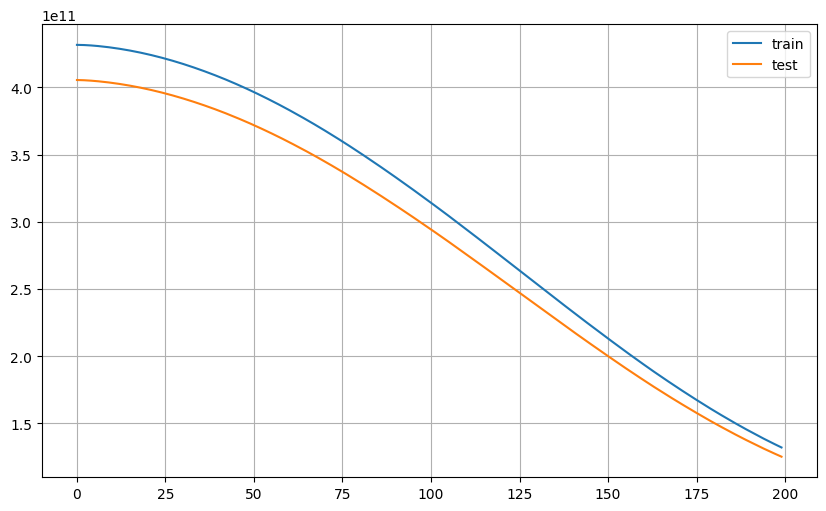

In [ ]:
import matplotlib.pyplot as plt

#Plot train and validation loss vs epochs
plt.figure(figsize=(10,6), dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.legend(['train', 'test'])

In [ ]:
#Model prediction
y_pred = model2.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

#Calculate and print RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Root Mean Squared Error: ' + str(rmse))

Root Mean Squared Error: 403316.1381750529


In [ ]:
from sklearn.metrics import mean_absolute_error

#Calculate and print MAE
mae = mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error: ' + str(mae))

Mean Absolute Error: 336177.1675083338
